# Predicting Titanic Survivors



### Setup Imports

In [42]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Getting the Data

In [3]:
titanic_df = pd.read_csv('train.csv')

### Getting basic info on the data

In [4]:
# Previewing the Data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Overall general info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Viewing the data types of each column
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploring the data

Lets try and answer some important questions like

* Who was on the titanic
* Who survived the titanic
* What factors may have lead to their survival

Who was on the titanic

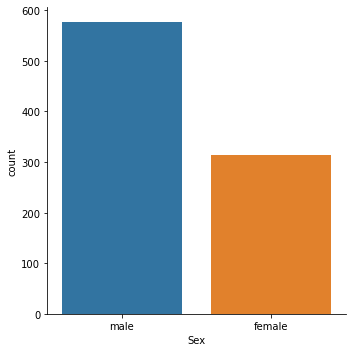

In [83]:
import warnings
warnings.filterwarnings("ignore")
# Graphing by Gender
sns.catplot('Sex',data=titanic_df,kind="count")

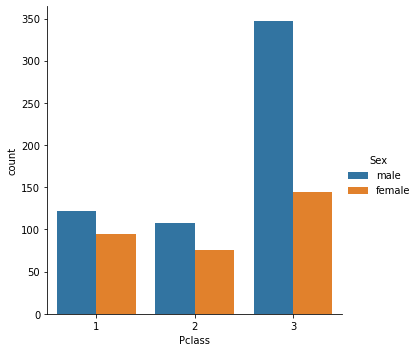

In [44]:
# Graphing by class
sns.catplot('Pclass',data=titanic_df,hue='Sex',kind="count")

Lets find out how many children were onboard

In [15]:
def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return 'child'
    else:
        return sex

In [16]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

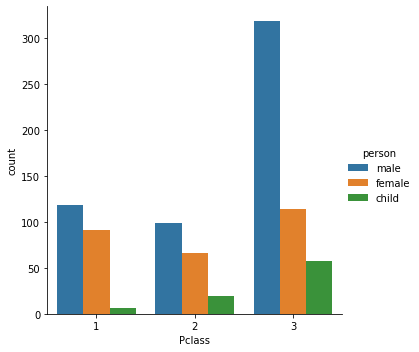

In [45]:
sns.catplot('Pclass',data=titanic_df,hue='person',kind='count')

Surprisingly most of the children are located in 3rd class

<AxesSubplot:>

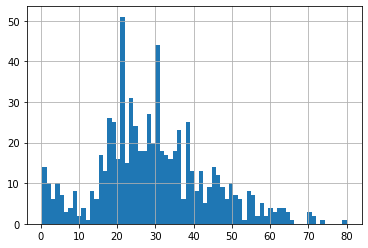

In [18]:
# Graphing age
titanic_df['Age'].hist(bins=70)

In [19]:
titanic_df['Age'].mean()

29.69911764705882

In [20]:
titanic_df['Age'].median()

28.0

In [21]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

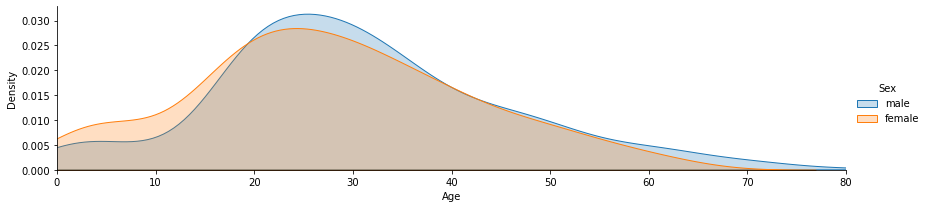

In [22]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

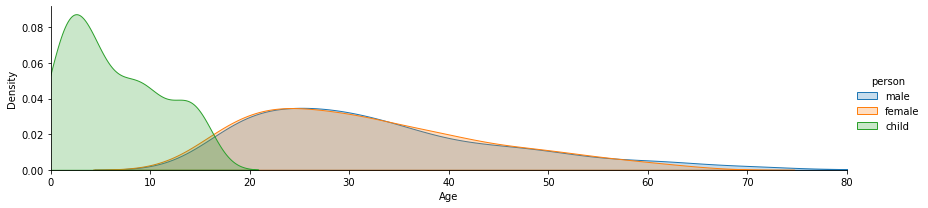

In [23]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

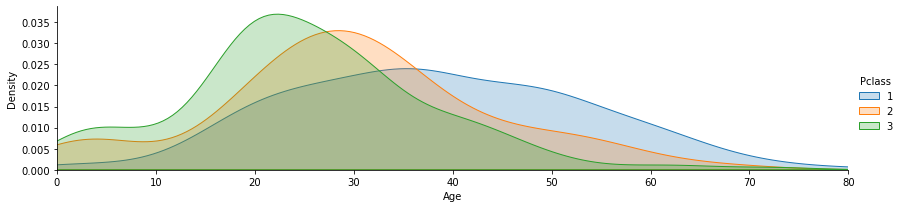

In [24]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))
fig.add_legend()

In [25]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

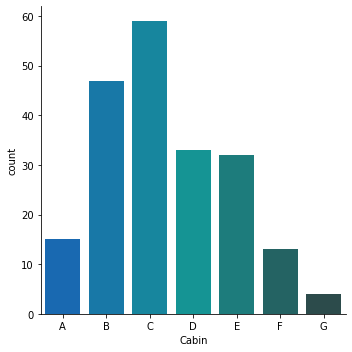

In [46]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin',data=cabin_df,order='ABCDEFG',kind='count',palette='winter_d')

Where did they depart from?

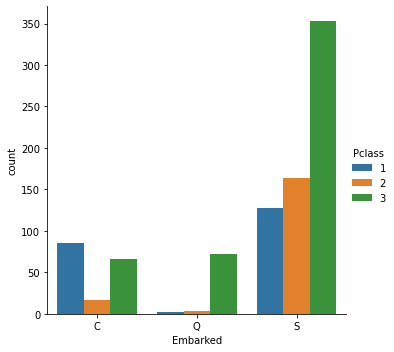

In [47]:
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count'
               ,order=['C','Q','S'])

Family compositions on the Titanic

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [30]:
index_1 = titanic_df.Alone > 0
index_2 = titanic_df.Alone == 0

titanic_df.loc[index_1, 'Alone'] = 'With Family'
titanic_df.loc[index_2, 'Alone'] = 'Alone'

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


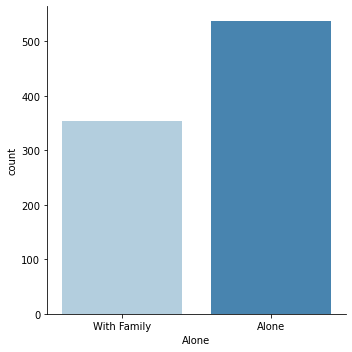

In [48]:
# Graphing who was alone
sns.catplot('Alone',data=titanic_df,palette='Blues',kind='count')

## Who Survived the Titanic

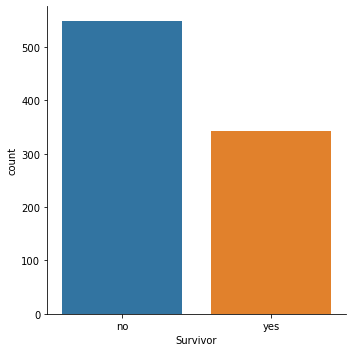

In [49]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.catplot('Survivor',data=titanic_df,kind='count')

Women and Children first right?
Lets find out

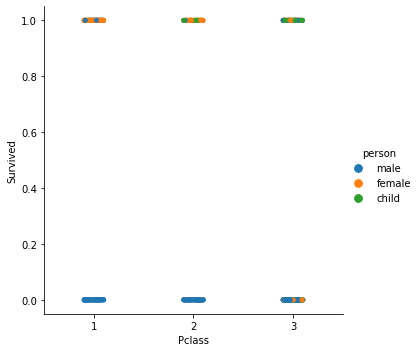

In [50]:
# Graphing by the sex/age
sns.catplot('Pclass','Survived',hue='person',data=titanic_df)

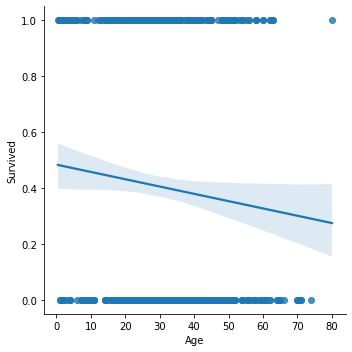

In [51]:
sns.lmplot('Age','Survived',data=titanic_df)

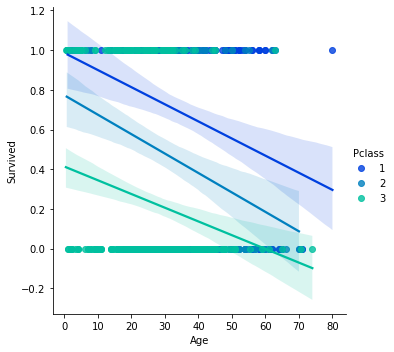

In [52]:
sns.lmplot('Age','Survived',hue='Pclass',palette='winter',data=titanic_df)

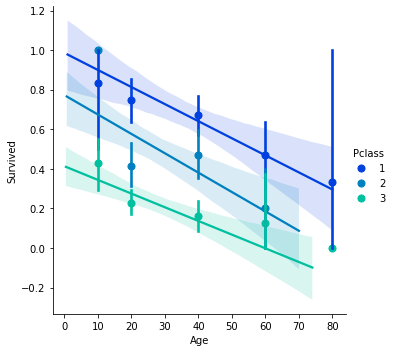

In [53]:
generations = [10,20,40,60,80]

sns.lmplot('Age','Survived',hue='Pclass',palette='winter',data=titanic_df,x_bins=generations)

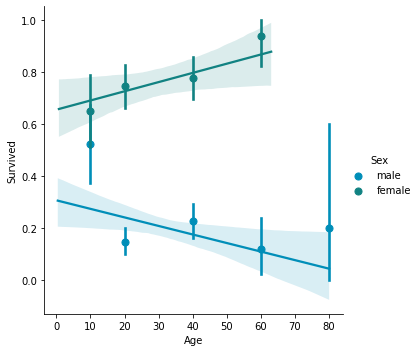

In [54]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter_d',x_bins=generations)

In [55]:
levels_df = titanic_df.dropna()
levels_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes


In [56]:
char_cabin = titanic_df["Cabin"].astype(str)

new_Cabin = np.array([cabin[0] for cabin in char_cabin])

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [57]:
titanic_df['Deck'] = new_Cabin
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no,n


In [58]:
# Just getting values with a deck level
deck_df = titanic_df[titanic_df.Deck != 'n']
deck_df = deck_df[deck_df.Deck != 'T']
deck_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor,Deck
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes,C
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no,E
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,child,With Family,yes,G
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,female,Alone,yes,C


In [59]:
deck_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,203.000000,203.000000,203.000000,184.000000,203.000000,203.000000,203.000000
mean,455.970443,0.669951,1.197044,35.779457,0.443350,0.438424,76.341708
std,251.869248,0.471393,0.527080,15.707436,0.629704,0.731133,74.520547
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,260.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.206250
50%,458.000000,1.000000,1.000000,36.000000,0.000000,0.000000,55.441700
75%,686.000000,1.000000,1.000000,48.000000,1.000000,1.000000,89.552100
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


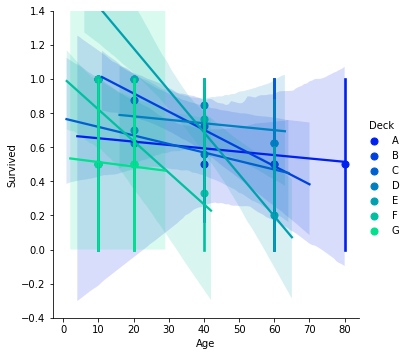

In [60]:
sns.lmplot('Age','Survived',hue="Deck", data=deck_df,palette='winter',
           hue_order=['A','B','C','D','E','F','G'], x_bins=generations).set(ylim=[-0.4,1.4])

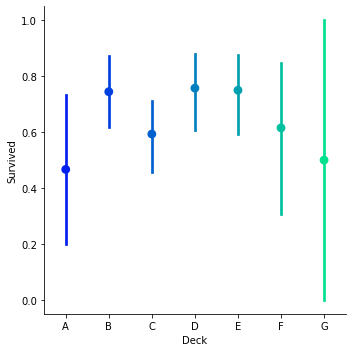

In [61]:
sns.factorplot('Deck','Survived',data=deck_df, palette='winter', order=['A','B','C','D','E','F','G'])

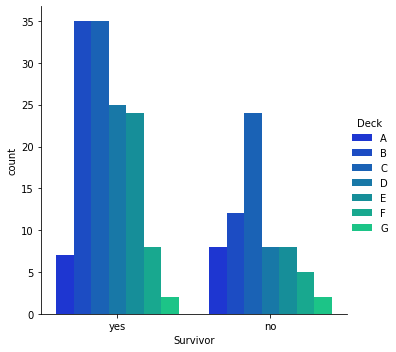

In [62]:
sns.catplot('Survivor',hue='Deck', data=deck_df, palette='winter',
               hue_order=['A','B','C','D','E','F','G'], kind="count")

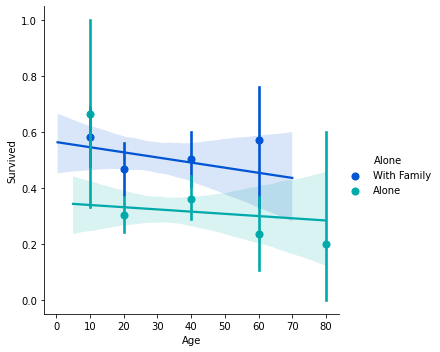

In [63]:
sns.lmplot('Age','Survived',hue='Alone',data=titanic_df,palette='winter',x_bins=generations)

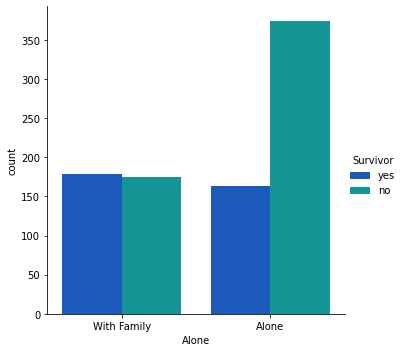

In [65]:
sns.catplot('Alone',hue='Survivor',data=titanic_df,palette='winter',kind="count", hue_order=['yes','no'])

You were more likely to survive if you went on the titanic with family

# Predicting Who Survived

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
train_df = pd.read_csv('train.csv')
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First we have to take care of the nulls and convert our strings to numbers

In [71]:
# Replaicng missing values

# Filling missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].median())

# Filling missing with the most common
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [72]:

# Making Columns

# Gender/Age
train_df['person'] = train_df[['Age','Sex']].apply(male_female_child,axis=1)

train_df['Alone'] = train_df.SibSp + train_df.Parch

# Alone/With Family
index_1 = train_df.Alone > 0
index_2 = train_df.Alone == 0

train_df.loc[index_1, 'Alone'] = 'With Family'
train_df.loc[index_2, 'Alone'] = 'Alone'

# Deck
train_df['Deck'] = new_Cabin
train_df['Deck'] = train_df['Deck'].astype('str')

#############################################################################

# Replacing sex
train_df.loc[train_df['Sex'] == 'male','Sex'] = 0
train_df.loc[train_df['Sex'] == 'female','Sex'] = 1

# Replacing person
train_df.loc[train_df['person'] == 'male','person'] = 0
train_df.loc[train_df['person'] == 'female','person'] = 1
train_df.loc[train_df['person'] == 'child','person'] = 2


# Replacing Location
train_df.loc[train_df['Embarked'] == 'S','Embarked'] = 0
train_df.loc[train_df['Embarked'] == 'C','Embarked'] = 1
train_df.loc[train_df['Embarked'] == 'Q','Embarked'] = 2

# Replace Alone
train_df.loc[train_df['Alone'] == 'With Family','Alone'] = 0
train_df.loc[train_df['Alone'] == 'Alone','Alone'] = 1

# Replace Deck 'A','B','C','D','E','F','G', 'T', 'n'
train_df.loc[train_df['Deck'] == 'A','Deck'] = 0
train_df.loc[train_df['Deck'] == 'B','Deck'] = 1
train_df.loc[train_df['Deck'] == 'C','Deck'] = 2
train_df.loc[train_df['Deck'] == 'D','Deck'] = 3
train_df.loc[train_df['Deck'] == 'E','Deck'] = 4
train_df.loc[train_df['Deck'] == 'F','Deck'] = 5
train_df.loc[train_df['Deck'] == 'G','Deck'] = 6
train_df.loc[train_df['Deck'] == 'T','Deck'] = 7
train_df.loc[train_df['Deck'] == 'n','Deck'] = 7


In [82]:
predictors = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'person', 'Alone', 'Deck']

alg = LogisticRegression(random_state=1)
scores = train_test_split(alg, train_df[predictors], train_df['Survived'])

print(scores.mean())

TypeError: Singleton array array(LogisticRegression(random_state=1), dtype=object) cannot be considered a valid collection.

In [76]:
# Test Data

test_df = pd.read_csv('test.csv')

# Replaicng missing values

# Filling missing values
test_df['Age'] = test_df['Age'].fillna(train_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(train_df['Fare'].median())

# Filling missing with the most common
test_df['Embarked'] = test_df['Embarked'].fillna('S')

In [77]:
test_cabin = test_df["Cabin"].astype(str)

test_Cabin = np.array([cabin[0] for cabin in test_cabin])

test_Cabin = pd.Categorical(test_Cabin)

In [78]:
# Making Columns
test_df['person'] = test_df[['Age','Sex']].apply(male_female_child,axis=1)

test_df['Alone'] = test_df.SibSp + test_df.Parch

index_1 = test_df.Alone > 0
index_2 = test_df.Alone == 0

test_df.loc[index_1, 'Alone'] = 'With Family'
test_df.loc[index_2, 'Alone'] = 'Alone'

test_df['Deck'] = test_Cabin
test_df['Deck'] = test_df['Deck'].astype('str')

# Replacing sex
test_df.loc[test_df['Sex'] == 'male','Sex'] = 0
test_df.loc[test_df['Sex'] == 'female','Sex'] = 1

# Replacing person
test_df.loc[test_df['person'] == 'male','person'] = 0
test_df.loc[test_df['person'] == 'female','person'] = 1
test_df.loc[test_df['person'] == 'child','person'] = 2


# Replacing Location
test_df.loc[test_df['Embarked'] == 'S','Embarked'] = 0
test_df.loc[test_df['Embarked'] == 'C','Embarked'] = 1
test_df.loc[test_df['Embarked'] == 'Q','Embarked'] = 2

# Replace Alone
test_df.loc[test_df['Alone'] == 'With Family','Alone'] = 0
test_df.loc[test_df['Alone'] == 'Alone','Alone'] = 1

# Replace Deck 'A','B','C','D','E','F','G', 'T', 'n'
test_df.loc[test_df['Deck'] == 'A','Deck'] = 0
test_df.loc[test_df['Deck'] == 'B','Deck'] = 1
test_df.loc[test_df['Deck'] == 'C','Deck'] = 2
test_df.loc[test_df['Deck'] == 'D','Deck'] = 3
test_df.loc[test_df['Deck'] == 'E','Deck'] = 4
test_df.loc[test_df['Deck'] == 'F','Deck'] = 5
test_df.loc[test_df['Deck'] == 'G','Deck'] = 6
test_df.loc[test_df['Deck'] == 'T','Deck'] = 7
test_df.loc[test_df['Deck'] == 'n','Deck'] = 7

In [79]:
# Predict Test values

alg.fit(train_df[predictors],train_df['Survived'])

# Make predictions using the test set
predictions = alg.predict(test_df[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset

submission = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predictions})

In [80]:

submission.to_csv('submission.csv')